In [3]:
import pandas as pd
import numpy as np
import time
import re
import pyspark
import string
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [1]:
import re

In [2]:
tweets_df = spark.read.json('hdfs:///user/ivy2/Tweets/')

In [3]:
tweets_df.cache()

DataFrame[contributors: string, coordinates: struct<coordinates:array<double>,type:string>, created_at: string, display_text_range: array<bigint>, entities: struct<hashtags:array<struct<indices:array<bigint>,text:string>>,media:array<struct<additional_media_info:struct<description:string,embeddable:boolean,monetizable:boolean,title:string>,description:string,display_url:string,expanded_url:string,id:bigint,id_str:string,indices:array<bigint>,media_url:string,media_url_https:string,sizes:struct<large:struct<h:bigint,resize:string,w:bigint>,medium:struct<h:bigint,resize:string,w:bigint>,small:struct<h:bigint,resize:string,w:bigint>,thumb:struct<h:bigint,resize:string,w:bigint>>,source_status_id:bigint,source_status_id_str:string,source_user_id:bigint,source_user_id_str:string,type:string,url:string>>,symbols:array<struct<indices:array<bigint>,text:string>>,urls:array<struct<display_url:string,expanded_url:string,indices:array<bigint>,url:string>>,user_mentions:array<struct<id:bigint,id_s

In [4]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)
tweets_df.limit(3).toPandas()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,limit,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,scopes,source,text,timestamp_ms,truncated,user,withheld_copyright,withheld_in_countries
0,None,None,Thu Jun 22 23:16:02 +0000 2017,None,"([], [(None, None, pic.twitter.com/ly3fCiX1x5, https://twitter.com/millselle/status/875063995505...","([(None, None, pic.twitter.com/ly3fCiX1x5, https://twitter.com/millselle/status/8750639955055411...",None,0,False,low,None,878028835710619648,878028835710619648,None,None,None,None,None,False,en,None,None,False,None,None,NaN,None,None,None,0,False,"(None, None, Wed Jun 14 18:54:49 +0000 2017, [0, 41], ([], [Row(additional_media_info=None, desc...",None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @millselle: my sister graduated from university today https://t.co/ly3fCiX1x5,1498173362077,False,"(False, Sat Nov 30 06:35:59 +0000 2013, True, False, shs 18' #celebratenedu 🇳🇬, 34038, None, 495...",None,None
1,None,None,Thu Jun 22 23:16:02 +0000 2017,"[0, 19]","([], None, [], [(twitter.com/politicalkathy…, https://twitter.com/politicalkathy/status/87802169...",None,None,0,False,low,None,878028835832209410,878028835832209410,None,None,None,None,None,True,en,None,None,False,None,"(None, None, Thu Jun 22 22:47:38 +0000 2017, [0, 140], ([], None, [], [Row(display_url='twitter....",8.780217e+17,878021691875536896,None,None,0,False,None,None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You clean up nice!😜 https://t.co/U5mw1v3cLb,1498173362106,False,"(False, Thu May 24 00:20:34 +0000 2012, True, False, religion of Gord , respect the value of fre...",None,None
2,None,None,Thu Jun 22 23:16:02 +0000 2017,None,"([], None, [], [], [(21906952, 21906952, [3, 11], ACEP, ACEPNow)])",None,None,0,False,low,None,878028837845696512,878028837845696512,None,None,None,None,None,False,en,None,None,None,None,None,NaN,None,None,None,0,False,"(None, None, Thu Jun 22 21:48:00 +0000 2017, None, ([], None, [], [Row(display_url='responsibili...",None,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @ACEPNow: Mike Wilson (University of Arkansas) was awarded a grant to use this tool in the ED...,1498173362586,False,"(False, Tue May 03 14:32:20 +0000 2016, True, False, None, 49, None, 12, None, 81, False, 727506...",None,None


In [5]:
tweets_df.count()

144910770

# Identify tweets related to UChicago and 3-4 universities of your choice & Discard irrelevant tweets

### Choose universities with sufficient tweeter activity

#### Discard irrelevant tweets

#### Will be 90%+ of the data 

In [9]:
chicago = ['%University of Chicago%', '%university of chicago%', '%UChicago%', '%Uchicago%', '%uchicago%', 
           '%UofChicago%', '%uofchicago%', '%U of Chicago%', '%u of chicago%']
harvard = ['%Harvard%', '%harvard%', '%Harvard University%', '%harvard university%']
stanford = ['%Stanford%', '%stanford%', '%Stanford University%', '%stanford university%']
northwestern = ['%Northwestern%', '%northwestern%', '%Northwestern University%', '%northwestern university%']

In [10]:
df = tweets_df.filter(
    tweets_df.text.like(chicago[0])     |
    tweets_df.text.like(chicago[1])     |
    tweets_df.text.like(chicago[2])     |
    tweets_df.text.like(chicago[3])     |
    tweets_df.text.like(chicago[4])     |
    tweets_df.text.like(chicago[5])     |
    tweets_df.text.like(chicago[6])     |
    tweets_df.text.like(chicago[7])     |
    tweets_df.text.like(chicago[8])     | 
    tweets_df.text.like(harvard[0])     |
    tweets_df.text.like(harvard[1])     |
    tweets_df.text.like(harvard[2])     |
    tweets_df.text.like(harvard[3])     |
    tweets_df.text.like(stanford[0])    |
    tweets_df.text.like(stanford[1])    |
    tweets_df.text.like(stanford[2])    |
    tweets_df.text.like(stanford[3])    |
    tweets_df.text.like(northwestern[0])|
    tweets_df.text.like(northwestern[1])|
    tweets_df.text.like(northwestern[2])|
    tweets_df.text.like(northwestern[3])
)

In [11]:
df = df.\
withColumn("university", 
           when(col('text').like(chicago[0])  |
                col('text').like(chicago[1])  |
                col('text').like(chicago[2])  |
                col('text').like(chicago[3])  |
                col('text').like(chicago[4])  |
                col('text').like(chicago[5])  |
                col('text').like(chicago[6])  |
                col('text').like(chicago[7])  |
                col('text').like(chicago[8]), 'Chicago').\
           when(col('text').like(harvard[0])  |
                col('text').like(harvard[1])  |
                col('text').like(harvard[2])  |
                col('text').like(harvard[3]), 'Harvard').\
           when(col('text').like(stanford[0])  |
                col('text').like(stanford[1])  |
                col('text').like(stanford[2])  |
                col('text').like(stanford[3]), 'Stanford').\
           when(col('text').like(northwestern[0])  |
                col('text').like(northwestern[1])  |
                col('text').like(northwestern[2])  |
                col('text').like(northwestern[3]), 'Northwestern')) 

In [12]:
df.write.format("parquet").save("hdfs:///user/anupriyat/final")

In [1]:
df = spark.read.parquet("hdfs:///user/anupriyat/final")

# Complete thorough EDA to identify which variables you can use to profile the Twitterers

#### Identify the most prolific / influential Twitter users

In [4]:
pd.set_option("display.max_colwidth", -1)
df.limit(3).toPandas()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweeted_status,scopes,source,text,timestamp_ms,truncated,user,withheld_copyright,withheld_in_countries,university
0,None,None,Wed Mar 14 20:15:02 +0000 2018,None,"([], None, [], [], [(777302125, 777302125, [3, 18], Kimberly Cotzias, kimbrolyclaire), (33639255, 33639255, [20, 34], Northwestern, NorthwesternU)])",None,None,0,False,low,...,"(None, None, Wed Mar 14 19:48:54 +0000 2018, [15, 140], ([], None, [], [Row(display_url='twitter.com/i/web/status/9…', expanded_url='https://twitter.com/i/web/status/974009496363241472', indices=[121, 144], url='https://t.co/zGtL1ykOOh')], [Row(id=33639255, id_str='33639255', indices=[0, 14], name='Northwestern', screen_name='NorthwesternU')]), None, ([15, 123], ([], [Row(additional_media_info=None, description=None, display_url='pic.twitter.com/7mEpPZolyG', expanded_url='https://twitter.com/kimbrolyclaire/status/974009496363241472/photo/1', id=974009491665629184, id_str='974009491665629184', indices=[124, 147], media_url='http://pbs.twimg.com/media/DYRgeN6WsAAL7AK.jpg', media_url_https='https://pbs.twimg.com/media/DYRgeN6WsAAL7AK.jpg', sizes=Row(large=Row(h=1024, resize='fit', w=768), medium=Row(h=1024, resize='fit', w=768), small=Row(h=680, resize='fit', w=510), thumb=Row(h=150, resize='crop', w=150)), source_status_id=None, source_status_id_str=None, source_user_id=None, source_user_id_str=None, type='photo', url='https://t.co/7mEpPZolyG', video_info=None)], [], [], [Row(id=33639255, id_str='33639255', indices=[0, 14], name='Northwestern', screen_name='NorthwesternU')]), ([Row(additional_media_info=None, description=None, display_url='pic.twitter.com/7mEpPZolyG', expanded_url='https://twitter.com/kimbrolyclaire/status/974009496363241472/photo/1', id=974009491665629184, id_str='974009491665629184', indices=[124, 147], media_url='http://pbs.twimg.com/media/DYRgeN6WsAAL7AK.jpg', media_url_https='https://pbs.twimg.com/media/DYRgeN6WsAAL7AK.jpg', sizes=Row(large=Row(h=1024, resize='fit', w=768), medium=Row(h=1024, resize='fit', w=768), small=Row(h=680, resize='fit', w=510), thumb=Row(h=150, resize='crop', w=150)), source_status_id=None, source_status_id_str=None, source_user_id=None, source_user_id_str=None, type='photo', url='https://t.co/7mEpPZolyG', video_info=None)],), @NorthwesternU It looks to be happening at the graduate building across the street from my apartment at Emerson &amp; Maple https://t.co/7mEpPZolyG), 40, False, low, None, 974009496363241472, 974009496363241472, NorthwesternU, 974007046889603072, 974007046889603072, 33639255, 33639255, False, en, None, False, 3, None, None, None, None, 11, 34, False, None, <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>, @NorthwesternU It looks to be happening at the graduate building across the street from my apartment at Emerson &amp; M… https://t.co/zGtL1ykOOh, True, (False, Fri Aug 24 03:18:46 +0000 2012, False, False, Just your average misanthropic music junkie and writer, fueled by the power of caffeine and literature, 6557, None, 214, None, 168, True, 777302125, 777302125, False, en, 2, Chicago, IL, Kimberly Cotzias, None, 101517, http://pbs.twimg.com/profile_background_images/435250974819512320/gaWQkArm.jpeg, https://pbs.twimg.com/profile_background_images/435250974819512320/gaWQkArm.jpeg, True, https://pbs.twimg.com/profile_banners/777302125/1430859845, http://pbs.twimg.com/profile_images/907938843306983424/kPxmezjn_normal.jpg, https://pbs.twimg.com/profile_images/907938843306983424/kPxmezjn_normal.jpg, 69BCC2, FFFFFF, DDEEF6, 333333, False, False, kimbrolyclaire, 13780, Eastern Time (US & Canada), none, http://honestdeconstruction.wordpress.com, -14400, False), None, None)",None,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kimbrolyclaire: @NorthwesternU It looks to be happening at the graduate building acro

In [10]:
df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- additional_media_info: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- embeddable: boolean (nullable = true)
 |    |    |    |    |-- monetizable: bo

In [5]:
# Drop duplicates
df = df.dropDuplicates(subset=['id','user'])

In [6]:
# Add column to add info on whether its retweet
df = df.withColumn('tweet_status',
                   when(col('retweeted_status').isNotNull(),'Retweet').\
                   when(col('text').like('RT %'),'Retweet').\
                   otherwise('Original'))

In [7]:
df2 = df.select(
    col('id').alias('tweet_id'),
    
    # add user info
    col('user').getItem('id').alias('user_id'),
    col('user').getItem('name').alias('user_name'),
    col('user').getItem('created_at').alias('user_created'),
    col('user').getItem('lang').alias('user_lang'),
    col('user').getItem('location').alias('user_location'),
    col('user').getItem('time_zone').alias('user_timezone'),
    col('user').getItem('statuses_count').alias('total_tweets'),
    col('user').getItem('followers_count').alias('followers'),
    col('user').getItem('friends_count').alias('followings'),
    col('created_at').alias('created_at'),
    
    # add geo info
    col('place').getItem('country').alias('country'),
    col('place').getItem('country_code').alias('country_code'),
    col('place').getItem('full_name').alias('full_name'),
    col('place').getItem('name').alias('name'),
    
    # add hashtags, text, University, and is_orig info
    col('entities').getItem('hashtags').getItem('text').alias('hashtags'),
    col('text').alias('text'),
    col('University').alias('University'),
    col('tweet_status').alias('tweet_status')
)

In [9]:
df2.write.format("parquet").save("hdfs:///user/anupriyat/df2")

In [10]:
df2 = spark.read.parquet("hdfs:///user/anupriyat/df2")

In [11]:
df2.cache()

DataFrame[tweet_id: bigint, user_id: bigint, user_name: string, user_created: string, user_lang: string, user_location: string, user_timezone: string, total_tweets: bigint, followers: bigint, followings: bigint, created_at: string, country: string, country_code: string, full_name: string, name: string, hashtags: array<string>, text: string, University: string, tweet_status: string]

In [12]:
df2.printSchema()

root
 |-- tweet_id: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_created: string (nullable = true)
 |-- user_lang: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- user_timezone: string (nullable = true)
 |-- total_tweets: long (nullable = true)
 |-- followers: long (nullable = true)
 |-- followings: long (nullable = true)
 |-- created_at: string (nullable = true)
 |-- country: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- full_name: string (nullable = true)
 |-- name: string (nullable = true)
 |-- hashtags: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- text: string (nullable = true)
 |-- University: string (nullable = true)
 |-- tweet_status: string (nullable = true)



# Identify the most prolific / influential Twitterers

#### How much are they tweeting about the Universities vs. other topics?

#### By message volume

In [18]:
# Total mentions per university
df2.groupBy('University').count().show()

+------------+-------+
|  University|  count|
+------------+-------+
|Northwestern|1178946|
|     Chicago| 279418|
|    Stanford| 636100|
|     Harvard|1776224|
+------------+-------+



In [19]:
# User with most message volume
user_id = df2.groupBy(col('user_id')).count().orderBy(col('count').desc()).head(1)[0][0]
volume = df2.filter((col('user_id')==user_id)).groupBy(col('user_id')).count().collect()[0][1]
total = df2.filter(col('user_id')==user_id).select(max(col('total_tweets'))).collect()[0][0]

In [28]:
print("The user id with the most message volume : {}".format(user_id))
print("The proportion of tweets regarding university vs others : {}".format(volume/total))
print("Tweets about universities: ")
df2.filter(col('user_id')==user_id).groupBy(col('University')).count().show()

The user id with the most message volume : 880005795974217728
The proportion of tweets regarding university vs others : 0.12467503267239077
Tweets about universities: 
+----------+-----+
|University|count|
+----------+-----+
|   Chicago|   14|
|  Stanford| 2046|
|   Harvard| 6812|
+----------+-----+



#### By message retweet

In [29]:
# User with most message retweet
user_id2 = df2.filter(col('tweet_status')=='Retweet').groupBy(col('user_id')).count().orderBy(col('count').desc()).head(1)[0][0]
retweets = df2.filter((col('tweet_status')=='Retweet') & (col('user_id')==user_id2)).\
groupBy(col('user_id')).count().select(max(col('count'))).collect()[0][0]
total2 = df2.filter(col('user_id')==user_id2).select(max(col('total_tweets'))).collect()[0][0]

In [30]:
print("The user id with the most message volume : {}".format(user_id2))
print("The proportion of tweets regarding university vs others : {}".format(retweets/total2))
print("Tweets about universities: ")
df2.filter(col('user_id')==user_id2).groupBy(col('University')).count().show()

The user id with the most message volume : 887182298340245504
The proportion of tweets regarding university vs others : 0.05979697375981613
Tweets about universities: 
+----------+-----+
|University|count|
+----------+-----+
|  Stanford| 1529|
|   Harvard|   32|
+----------+-----+



# Where are these Twitterers located?

#### For UChicago

In [32]:
chi = df2.filter((col('University')=='Chicago') & (col('user_location').isNotNull())).\
groupBy(col('user_location')).count().orderBy(col('count').desc()).toPandas()
chi.head(5)

,user_location,count
0,"Chicago, IL",26523
1,Chicago,9739
2,"Chicago, Illinois",5018
3,United States,3992
4,"Washington, DC",2906


#### For other universities

In [36]:
# For NorthWestern
nor = df2.filter((col('University')=='Northwestern') & (col('user_location').isNotNull())).\
groupBy(col('user_location')).count().orderBy(col('count').desc()).toPandas()
nor.head(5)

,user_location,count
0,"Chicago, IL",31610
1,United States,16756
2,"Evanston, IL",16587
3,Chicago,12867
4,"Washington, DC",5401


In [35]:
# For Stanford
sta = df2.filter((col('University')=='Stanford') & (col('user_location').isNotNull())).\
groupBy(col('user_location')).count().orderBy(col('count').desc()).toPandas()
sta.head(5)

,user_location,count
0,United States,12082
1,"Stanford, CA",8515
2,"San Francisco, CA",6334
3,USA,6154
4,"California, USA",5960


In [37]:
# For Harvard
har = df2.filter((col('University')=='Harvard') & (col('user_location').isNotNull())).\
groupBy(col('user_location')).count().orderBy(col('count').desc()).toPandas()
har.head(5)

,user_location,count
0,United States,31492
1,"Boston, MA",14669
2,"Cambridge, MA",12716
3,"California, USA",10868
4,"New York, NY",10237


#### Do you see any relationship between university locations and Twitterers’ locations?

Yes, most users seem to live near where the school is located.

#### Visualize the relationships

In [38]:
import matplotlib.pyplot as plt

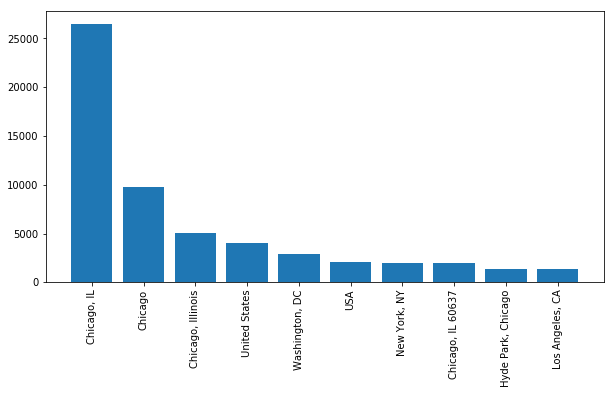

In [39]:
# Visualize the relationships (Chicago)

plt.figure(figsize=(10,5))
plt.bar(chi.iloc[0:10,0], chi.iloc[0:10,1])
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

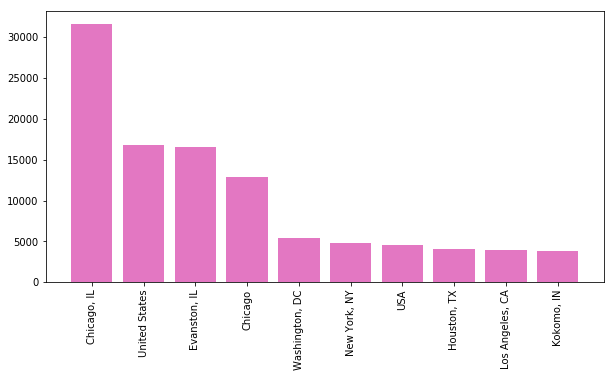

In [46]:
# Visualize the relationships (Northwestern)

plt.figure(figsize=(10,5))
plt.bar(nor.iloc[0:10,0], nor.iloc[0:10,1], color='C6')
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

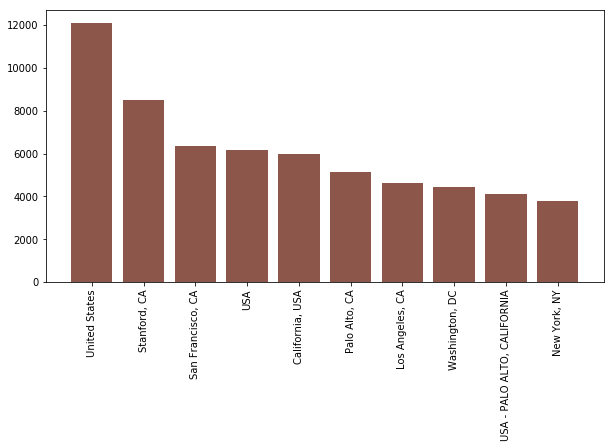

In [47]:
# Visualize the relationships (Stanford)

plt.figure(figsize=(10,5))
plt.bar(sta.iloc[0:10,0], sta.iloc[0:10,1], color='C5')
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

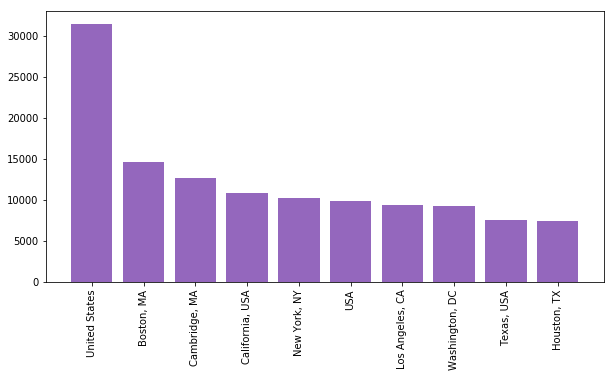

In [44]:
# Visualize the relationships (Harvard)

plt.figure(figsize=(10,5))
plt.bar(har.iloc[0:10,0], har.iloc[0:10,1], color='C4')
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

# What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities

In [48]:
chi_sub = chi.iloc[0:10,]
nor_sub = nor.iloc[0:10,]
sta_sub = sta.iloc[0:10,]
har_sub = har.iloc[0:10,]

In [49]:
# Grouping locations
# UChicago
chi_sub.loc[chi_sub['user_location'].str.contains('Chicago'),'user_location'] = 'Chicago'
chi_sub = chi_sub.groupby('user_location').agg('sum').sort_values('count', ascending=False)

# Northwestern
nor_sub.loc[nor_sub['user_location'].str.contains('Chicago'),'user_location'] = 'Chicago'
nor_sub.loc[nor_sub['user_location']=='USA','user_location'] = 'United States'
nor_sub = nor_sub.groupby('user_location').agg('sum').sort_values('count', ascending=False)

# Stanford
sta_sub.loc[sta_sub['user_location'].str.contains('PALO'),'user_location'] = 'Palo Alto, CA'
sta_sub.loc[sta_sub['user_location']=='USA','user_location'] = 'United States'
sta_sub = sta_sub.groupby('user_location').agg('sum').sort_values('count', ascending=False)

# Harvard
har_sub.loc[har_sub['user_location']=='USA','user_location'] = 'United States'
har_sub = har_sub.groupby('user_location').agg('sum').sort_values('count', ascending=False)

/software/Anaconda3-5.1.0-hadoop/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Visualize the trends

Text(0.5,1,'User Location for Harvard \n\n')

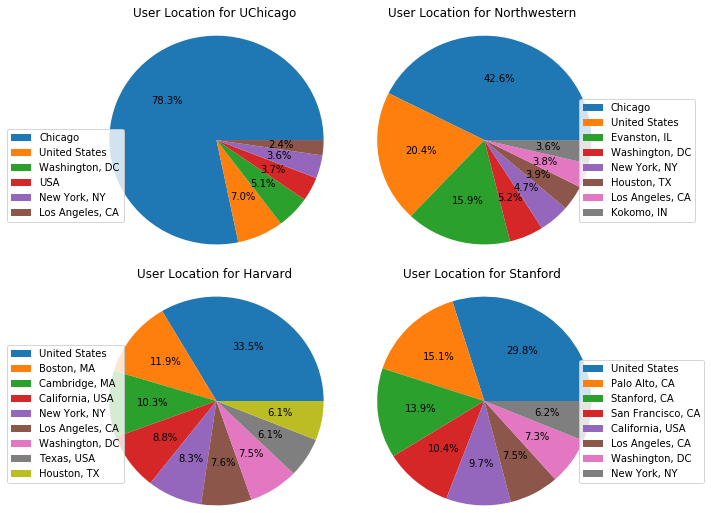

In [50]:
# Piecharts of locations of users per university
fig, ax = plt.subplots(2,2, figsize=(8,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax[0,0].pie(chi_sub, autopct='%1.1f%%', radius=1.5, pctdistance=0.6)
ax[0,0].legend(labels=chi_sub.index, loc="lower left", bbox_to_anchor=(-0.7,0))
ax[0,0].set_title('User Location for UChicago \n\n')

ax[0,1].pie(nor_sub, autopct='%1.1f%%', radius=1.5, pctdistance=0.6)
ax[0,1].legend(labels=nor_sub.index,loc="lower left", bbox_to_anchor=(1,0))
ax[0,1].set_title('User Location for Northwestern \n\n')

ax[1,1].pie(sta_sub, autopct='%1.1f%%', radius=1.5, pctdistance=0.6)
ax[1,1].legend(labels=sta_sub.index,loc="lower left", bbox_to_anchor=(1,0))
ax[1,1].set_title('User Location for Stanford \n\n')

ax[1,0].pie(har_sub, autopct='%1.1f%%', radius=1.5, pctdistance=0.6)
ax[1,0].legend(labels=har_sub.index,loc="lower left", bbox_to_anchor=(-0.7,0))
ax[1,0].set_title('User Location for Harvard \n\n')

The users who tweet about UChicago are mostly located in Chicago area (almost 78%) compared to other universities. About half of users who tweet about Northwestern are also located in Chicago area followed by Evanston where the univeristy is located. In comparison with these two universities, the users who tweet about Harvard and Stanford are quite evenly located in various area.

# What are the timelines of these tweets? Do you see significant peaks and valleys?

In [51]:
from datetime import datetime
from dateutil.parser import parse

In [52]:
dt =  udf(lambda x: datetime.strptime(x,'%a %b %d %H:%M:%S %z %Y'), DateType())

In [53]:
df2 = df2.withColumn('created_at', dt(col('created_at')))

In [54]:
df2.limit(3).toPandas()

,tweet_id,user_id,user_name,user_created,user_lang,user_location,user_timezone,total_tweets,followers,followings,created_at,country,country_code,full_name,name,hashtags,text,University,tweet_status
0,877896221850861569,2229794348,Jobs Chicago,Wed Dec 04 12:03:33 +0000 2013,en,Chicago,Pacific Time (US & Canada),17385,273,202,2017-06-22,None,None,None,None,[],"Reseach Technologist 3 - Northwestern University - Chicago, IL https://t.co/2bRbDvDVnS Jobs Chicago",Northwestern,Original
1,877904915015782400,78800820,Climber.com EDU Jobs,Thu Oct 01 04:13:35 +0000 2009,en,None,Pacific Time (US & Canada),333496,582,11,2017-06-22,None,None,None,None,"[jobs, Stanford]","Research Coordinator - Stanford, CA, 94305, USA #jobs #Stanford pls RT: ## Description The Department of Psychology… https://t.co/NplNiMn9P5",Stanford,Original
2,877905786277576704,78800820,Climber.com EDU Jobs,Thu Oct 01 04:13:35 +0000 2009,en,None,Pacific Time (US & Canada),333513,582,11,2017-06-22,None,None,None,None,"[jobs, Stanford]","Clinical Research Operations Specialist I - Stanford, CA, 94305, USA #jobs #Stanford pls RT: ## Description The… https://t.co/qTIqfQi4VS",Stanford,Original


In [55]:
timedf = df2.groupBy(col('created_at'), col('University')).count().orderBy(col('created_at')).toPandas()

In [56]:
timedf = timedf.pivot(index='created_at', columns='University', values='count')
timedf.head()

University,Chicago,Harvard,Northwestern,Stanford
created_at,,,,
2017-06-22,178,614,570,749
2017-06-23,211,968,1277,889
2017-06-24,147,744,914,795
2017-06-25,249,915,758,790
2017-06-26,243,964,1209,1081


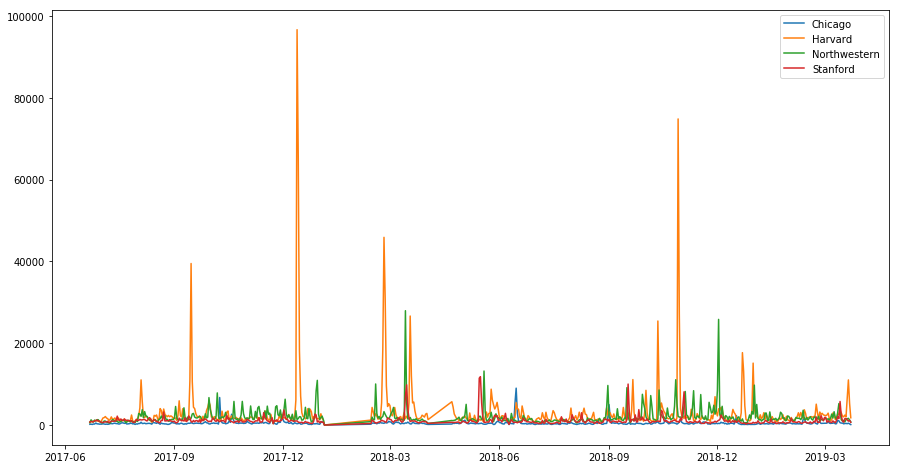

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(timedf)
plt.legend(labels=timedf.columns)
plt.show()

There are significant peaks for especially harvard university followed by Northwestern, Stanford, and UChicago.
Harvard has the maximum peak at 2017-12-13, Northwestern at 2018-03-14, Stanford at 2018-05-16, and Uchicago at 2018-06-15. 

#### Do you see data collection gaps?

There is a gap between 2018-01-05 and 2018-02-13.

In [59]:
timedf.idxmax()

University
Chicago         2018-06-15
Harvard         2017-12-13
Northwestern    2018-03-14
Stanford        2018-05-16
dtype: object

In [60]:
pd.DataFrame(timedf.index)[190:200]

,created_at
190,2017-12-29
191,2017-12-30
192,2017-12-31
193,2018-01-01
194,2018-01-02
195,2018-01-03
196,2018-01-04
197,2018-01-05
198,2018-02-13
199,2018-02-14


# How unique are the messages for each of these universities?

In [13]:
import nltk as nltk
import nltk.corpus

In [14]:
from nltk.corpus import stopwords

In [15]:
chi_text = df2.filter((col('University') =='Chicago') & 
                     (col('tweet_status')=='Original')).select(['text']).toPandas()
nor_text = df2.filter((col('University') =='Northwestern') & 
                     (col('tweet_status')=='Original')).select(['text']).toPandas().sample(n=50000)
sta_text = df2.filter((col('University') =='Stanford') & 
                     (col('tweet_status')=='Original')).select(['text']).toPandas().sample(n=50000)
har_text = df2.filter((col('University') =='Harvard') & 
                     (col('tweet_status')=='Original')).select(['text']).toPandas().sample(n=50000)

In [16]:
def tokenize(df, univ) :
    
    words = set(nltk.corpus.stopwords.words('english') + list(string.punctuation) + list(univ.lower().split()))
    
    n = df.shape[0]
    res = list()
    for i in range(n):
        a = df.iloc[i,0].lower()
        b = nltk.word_tokenize(a)
        b = [word for word in b if word not in words]
        res.append(b)
    return res

In [17]:
def freq_words(df, univ):
    
    words = set(nltk.corpus.stopwords.words('english') + list(string.punctuation) + list(univ.lower().split()))    
    
    n = df.shape[0]
    freq_df = pd.DataFrame()
    
    for i in range(n):
        a = df.iloc[i,0]
        b = [word for word in a.lower().split() if word not in words]        
        if len(b) >= 3:
            b = nltk.ngrams(b,3)
            c = nltk.FreqDist(b).most_common()
            freq_df = freq_df.append(c)

    freq_df.columns = ['ngram', 'freq']    
    

    freq_df = freq_df.groupby(['ngram']).agg('sum').sort_values(['freq'],ascending=False)
    
    return freq_df 

In [18]:
chi_text['token'] = tokenize(chi_text, 'University of Chicago')
nor_text['token'] = tokenize(nor_text, 'Northwestern University')
sta_text['token'] = tokenize(sta_text, 'Stanford University')
har_text['token'] = tokenize(har_text, 'Harvard University')

In [19]:
chi_freq = freq_words(chi_text.iloc[0:,],'University of Chicago')
chi_freq.head(10)

,freq
ngram,
"(booth, school, business)",348
"(bioresearch, product, faire)",332
"(sat,, act, optional)",270
"(nobel, prize, economics)",255
"(richard, thaler, wins)",248
"(make, sat,, act)",243
"(becomes, first, elite)",240
"(first, elite, college)",225
"(elite, college, make)",221


In [24]:
import nltk

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anupriyat/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nor_freq = freq_words(nor_text.sample(n=50000).iloc[0:,], 'Northwestern University')
nor_freq.head(10)

,freq
ngram,
"(severe, thunderstorm, warning)",304
"(national, weather, service)",264
"(mutual, wealth, management)",256
"(thunderstorm, warning, for...)",238
"(music, city, bowl)",176
"(significant, weather, advisory)",171
"(wealth, management, co.)",163
"(mutual, investment, management)",160
"(investment, management, company)",156


In [21]:
sta_freq = freq_words(sta_text.sample(n=50000).iloc[0:,], 'Stanford University')
sta_freq.head(10)

,freq
ngram,
"(@stanford, u:, usa)",675
"(u:, usa, 🇺🇸)",650
"(usa, 🇺🇸, america!!)",300
"(""this, going, save)",237
"(us, sooo, much)",237
"(going, save, us)",237
"(save, us, sooo)",237
"(sooo, much, money!"")",237
"(much, money!"", #stopdrymarkeritis)",237


In [22]:
har_freq = freq_words(har_text.sample(n=50000).iloc[0:,], 'Harvard University')
har_freq.head(10)

,freq
ngram,
"(@xychelsea, @harvard, @cia)",692
"(bear, keychain, written)",400
"(@xychelsea, @cia, @harvard)",335
"(@foxnews, @hillaryclinton, @harvard)",329
"(sociological, study, conducted)",286
"(study, conducted, university.)",263
"(@potus, @harvard, @brookingsinst)",261
"(month, sociological, study)",250
"(24, month, sociological)",222


In [23]:
# Top 10
chi_top = set([j for i in chi_freq.head(10).index for j in i])
nor_top = set([j for i in nor_freq.head(10).index for j in i])
sta_top = set([j for i in sta_freq.head(10).index for j in i])
har_top = set([j for i in har_freq.head(10).index for j in i])

In [24]:
def jaccard(df, top):
    n = df.shape[0]
    res = list()    
    for i in range(n):
        a = df.iloc[i,1]
        intersection = len(list(set(a).intersection(set(top))))
        union = len(set(a)) + len(set(top)) - intersection
        jaccard_similarity = intersection / union
        res.append(jaccard_similarity)
    return res

In [25]:
# Jaccard similarity for each university
chi_text['jaccard'] = jaccard(chi_text,chi_top)
nor_text['jaccard'] = jaccard(nor_text,nor_top)
sta_text['jaccard'] = jaccard(sta_text,sta_top)
har_text['jaccard'] = jaccard(har_text,har_top)

In [26]:
print('UChicago : {:.4f}'.format(chi_text[chi_text['jaccard']>=0.05].shape[0]/chi_text.shape[0]))
print('Northwestern : {:.4f}'.format(nor_text[nor_text['jaccard']>=0.05].shape[0]/nor_text.shape[0]))
print('Stanford : {:.4f}'.format(sta_text[sta_text['jaccard']>=0.05].shape[0]/sta_text.shape[0]))
print('Harvard : {:.4f}'.format(har_text[har_text['jaccard']>=0.05].shape[0]/har_text.shape[0]))

UChicago : 0.0331
Northwestern : 0.0319
Stanford : 0.0246
Harvard : 0.0154


Based on the frequent topics analysis, I would say small portion of people tweeted similar topics. Uchicago has the highest Jaccard similarity – the topics seem diverse but there are about 500 people talking about nobel prize winner, Richard Thaler and also people talking about booth school. Northwestern has the second highest Jaccard similarity – over 500 people talked about weather.